In [37]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

Question 1

In [38]:
# read in the problem 1 data csv
x = np.genfromtxt("problem_1_data.csv", delimiter = ",")
x = np.reshape(x, (x.shape[0], 1))

# create the Polynomial feature map
poly = PolynomialFeatures(degree=2, include_bias=True)
phi = poly.fit_transform(x)

# read in the y problem 1 label data
y = np.genfromtxt("problem_1_label.csv")
y = np.reshape(y, (y.shape[0], 1))

In [39]:
# function to get the close form solution
def close_form(phi, y):
    return (np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y))

# calculate the weights and print them out
w = close_form(phi, y)
a = round(w[2].item(), 4)
b = round(w[1].item(), 4)
c = round(w[0].item(), 4)
print("Best a weight: \n",a)
print("Best b weight: \n",b)
print("Best c weight: \n",c)

Best a weight: 
 1.0662
Best b weight: 
 -0.5817
Best c weight: 
 4.0134


In [40]:
xp = np.linspace(0,1,10)
# use the weights to create the function
fₓ = a*xp*xp + b*xp + c

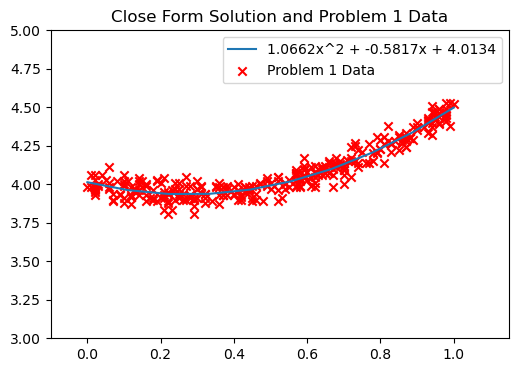

In [41]:
# create the function over data plot
plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(xp, fₓ, label = f"{a}x^2 + {b}x + {c}")
plt.scatter(phi[:,1], y, color='red', marker = "x", label = "Problem 1 Data")
plt.xlim(-0.1,1.15)
plt.title("Close Form Solution and Problem 1 Data")
plt.ylim(3,5)
plt.legend()

Question 2

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [43]:
# read in the x and y data
x = np.genfromtxt("problem_2_data.csv", delimiter = ",")

y = np.genfromtxt("problem_2_label.csv").reshape(-1,1)

In [44]:
# split into the train and rest
[X, X_rest, y, y_rest] = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
# split the rest into validate and test
[Xv, Xt, Yv, Yt] = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

In [46]:
# scale the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
Xv = scaler.transform(Xv)
Xt = scaler.transform(Xt)

Linear Regression Gradient Descent

In [47]:
# create the linear feature maps
x_linear_train = np.hstack((np.ones((X.shape[0], 1)), X))

x_linear_val = np.hstack((np.ones((Xv.shape[0], 1)), Xv))

x_linear_test = np.hstack((np.ones((Xt.shape[0], 1)), Xt))

n_size_train = x_linear_train.shape[0]


n = 0.01
d_train = x_linear_train.shape[1]

w_train = np.zeros((d_train,1))

In [48]:
# function to find mse
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

In [49]:
# function for the linear regression function
def ftrain(w):
    ftotal = 0

    for theta1, y1 in zip(x_linear_train, y):
        theta1 = np.reshape(theta1, (theta1.shape[0],1))
        ftotal += (w.T.dot(theta1) - y1)**2


    return ((1/n_size_train) * ftotal).item()

In [50]:
# function for the gradient
def fᑊtrain(w_train):
	fprime = np.zeros((d_train,1))
	for phi1, y1 in zip(x_linear_train,y):
		phi1 = np.reshape(phi1, (d_train,1))
		fprime += (w_train.T.dot(phi1) - y1)*phi1
	return (2/n_size_train)*fprime

In [51]:
# gradient descent
f_value_list = []
for i in range(1000):
	w_train = w_train - n*fᑊtrain(w_train)
	f_value_list.append(ftrain(w_train))

In [52]:
print('Best w = \n', w_train)

Best w = 
 [[-1.89900000e-01]
 [ 2.96903128e+00]
 [ 1.00820889e+00]
 [ 2.16229565e-03]
 [ 1.98167320e+00]
 [ 4.07084308e+00]]


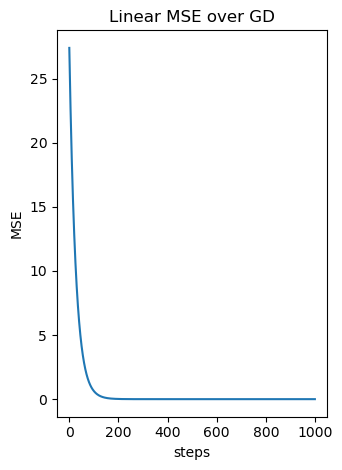

In [53]:
# Display the error over GD
plt.subplot(122)
plt.plot(f_value_list)
plt.title('Linear MSE over GD')
plt.xlabel('steps')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()

In [54]:
y_train_pred = x_linear_train.dot(w_train)
mse_train = mse(y, y_train_pred)
print("MSE for the training: ",mse_train)

MSE for the training:  0.0023282579832390295


In [55]:
y_val_pred = x_linear_val.dot(w_train)
mse_val = mse(Yv, y_val_pred)
print("MSE for the validation: ",mse_val)

MSE for the validation:  0.002126338675297833


In [56]:
Yv.shape

(50, 1)

In [57]:
y_val_pred.shape

(50, 1)

In [58]:
y_test_pred = x_linear_test.dot(w_train)
mse_test = mse(Yt, y_test_pred)
print("MSE for the test: ",mse_test)

MSE for the test:  0.003307852390289852


Polynomial Regression Gradient Descent

In [59]:
# create the polynomial feature maps
x_poly_train = PolynomialFeatures(degree=2, include_bias=True).fit_transform(X)

x_poly_val = PolynomialFeatures(degree=2, include_bias=True).fit_transform(Xv)

x_poly_test = PolynomialFeatures(degree=2, include_bias=True).fit_transform(Xt)

In [60]:
n_size = x_poly_train.shape[0]

d_train = x_poly_train.shape[1]

n = 0.0001

w_train = np.zeros((d_train,1))

In [61]:
# gradient descent
mse_list = []
for i in range(1000):
    fᑊ = x_poly_train.T.dot(x_poly_train.dot(w_train) - y)
    w_train = w_train - n*fᑊ
    sum = (x_poly_train.dot(w_train) - y)
    mse = (sum.T.dot(sum)/n_size).item()
    mse_list.append(mse)


In [62]:
# function to find mse
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

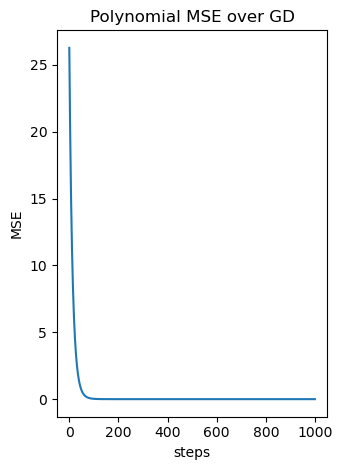

In [63]:
# Display the error over GD
plt.subplot(122)
plt.plot(mse_list)
plt.title('Polynomial MSE over GD')
plt.xlabel('steps')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()

In [64]:
poly_train_pred = x_poly_train.dot(w_train)
mse_train = mse(y, poly_train_pred)
print("MSE for the training: ",mse_train)

MSE for the training:  0.002277331181634982


In [65]:
poly_val_pred = x_poly_val.dot(w_train)
mse_val = mse(Yv, poly_val_pred)
print("MSE for the validation: ",mse_val)

MSE for the validation:  0.002061757171435904


In [74]:
poly_val_pred

array([[ -6.32310701],
       [ -8.71982736],
       [ -0.2074389 ],
       [ -1.60042107],
       [ -1.26050588],
       [  2.02983689],
       [  1.49720765],
       [  5.29726219],
       [ -0.20348102],
       [  2.7559198 ],
       [ -8.09538965],
       [ -3.12392585],
       [  4.74794518],
       [ 13.92312301],
       [  2.90281939],
       [ -8.70393728],
       [ 18.25955172],
       [  5.47685309],
       [ -2.59756929],
       [  5.69489349],
       [  7.68747912],
       [  3.06244241],
       [  9.16414923],
       [  7.89149828],
       [ -3.84068915],
       [  3.74024818],
       [  7.49221328],
       [  0.25392323],
       [-13.50087024],
       [ -2.68035045],
       [  5.5845455 ],
       [ -3.8624816 ],
       [ -7.72245596],
       [  1.14935532],
       [ -4.82712534],
       [ -3.26096022],
       [  1.49904144],
       [  0.11667662],
       [ -0.36665757],
       [  6.93374677],
       [-14.3098008 ],
       [  5.45651595],
       [ -8.1604132 ],
       [ -0

In [66]:
poly_test_pred = x_poly_test.dot(w_train)
mse_test = mse(Yt, poly_test_pred)
print("MSE for the test: ",mse_test)

MSE for the test:  0.003373209098853897


Between the Linear and 2nd-Order Polynomial Regression models, I would pick the Linear model because if we are looking at the MSEs for the test data, the MSE is lower in the Linear model than in the 2nd-Order Polynomial (though by very little). Therefore, it seems the Linear model is more accurate.

Question 3

In [67]:
# read in the lunch data
x = np.genfromtxt("lunch_wait_time.csv", delimiter=',')

# function that we get when we take the derivative of the minimization problem and set it equal to 0 to solve for theta
def root_function(x):
    return x.shape[0]/np.sum(x)

# find the closed form solution
closed_form_theta = root_function(x)
print("Closed form solution for θ:",closed_form_theta)

n_step = .001

# starting weight
w = 1

# function for the gradient
def gradient(w):
    return -x.shape[0]/w + np.sum(x)

# gradient descent
for i in range(750):
    w = w - n_step * gradient(w)
print()
print("Grad Descent:",w)



Closed form solution for θ: 0.9610764055742432

Grad Descent: 0.9610764055742433


Population mean, variance, standard deviation

In [68]:
import numpy as np

x = np.genfromtxt("lunch_wait_time.csv", delimiter = ",")

# find pop mean
mean = np.mean(x)

# find pop variance
variance = np.var(x)

# find the population standard deviation
std_deviation = np.sqrt(variance)

print("Population Mean:", mean)
print("Population Variance:", variance)
print("Population Standard Deviation:", std_deviation)

Population Mean: 1.0405
Population Variance: 1.0283297500000002
Population Standard Deviation: 1.0140659495318833


Question 4

In [69]:
# create the A and y arrays

A = np.array([[1,1,1], [4,2,1], [9,3,1], [16,4,1]])

y = np.array([[2],[4],[8],[14]])

Question 4 Gradient Descent

In [70]:
import numpy as np

# the original function
def f(w, A, y):
    return ((np.dot(A, w) - y)**2)

# we get this derivative from using help from the Linear regression derivative in Lecture 4
def fprime(w, A, y):
    return 2 * (A.T.dot((np.dot(A, w) - y)))


d = A.shape[1]

# starting w
w = np.array([[1.0],[1.0],[1.0]])

# n step
n = 0.001


In [71]:
# gradient descent
f_value_list = []
for i in range(1000000):
	w = w - n*fprime(w, A, y)				# gradient descent update w
	f_value_list.append(f(w, A, y))

In [72]:
print("Gradient Descent Best w \n",w)

Gradient Descent Best w 
 [[ 1.]
 [-1.]
 [ 2.]]


Question 4 Close Form

In [73]:
# close form solution formula
def close_form(phi, y):
    return (np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y))

# find the best weights
w = close_form(A, y)

print("Close Form Solution Best w \n",w)

Close Form Solution Best w 
 [[ 1.]
 [-1.]
 [ 2.]]
